# Text Segmentation Using Hidden Markov Models

Maxime Tchibozo 

# Pre-processing

In [1]:
import os
import numpy as np
os.chdir('dat\dat')

In [2]:
try:
    with open("dat\dat\mail.lst",'r') as f :
        mail_files = f.readlines()
except:
    with open("mail.lst",'r') as f :
        mail_files = f.readlines()

In [3]:
mail_files[0][:-1]

'mail1.dat'

In [4]:
'mail.lst'[-3:]

'lst'

In [5]:
L = []
for file in os.listdir(os.getcwd()):
    if file[-3:] == 'dat': #We only read the .dat files
        L.append(np.loadtxt(str(file)))

In [6]:
L

[array([ 70., 114., 111., ..., 115.,  10.,  10.]),
 array([ 70., 114., 111., ..., 107.,  10.,  10.]),
 array([ 70., 114., 111., ..., 108.,  10.,  10.]),
 array([ 70., 114., 111., ..., 108.,  10.,  10.]),
 array([ 70., 114., 111., ..., 101.,  10.,  10.]),
 array([ 70., 114., 111., ..., 115.,  10.,  10.]),
 array([ 70., 114., 111., ..., 107.,  10.,  10.]),
 array([ 70., 114., 111., ..., 117.,  10.,  10.]),
 array([ 70., 114., 111., ...,  10.,  10.,  10.]),
 array([ 70., 114., 111., ..., 101.,  10.,  10.]),
 array([ 70., 114., 111., ...,  10.,  10.,  10.]),
 array([ 70., 114., 111., ...,  10.,  10.,  10.]),
 array([ 70., 114., 111., ..., 101.,  10.,  10.]),
 array([ 70., 114., 111., ...,  10.,  10.,  10.]),
 array([ 70., 114., 111., ..., 101.,  10.,  10.]),
 array([ 70., 114., 111., ..., 101.,  10.,  10.]),
 array([ 70., 114., 111., ...,  10.,  10.,  10.]),
 array([ 70., 114., 111., ..., 101.,  10.,  10.]),
 array([ 70., 114., 111., ..., 107.,  10.,  10.]),
 array([ 70., 114., 111., ..., 

In [7]:
[len(item) for item in L] #length of each e-mail vector

[5216,
 3715,
 3475,
 3993,
 3328,
 6576,
 6808,
 2627,
 3425,
 3077,
 2620,
 3376,
 2434,
 2664,
 3643,
 3750,
 3701,
 3238,
 4467,
 3148,
 2541,
 2890,
 3934,
 5160,
 3424,
 3386,
 3211,
 3848,
 3558,
 8625]

# Question 1

Initial probability vector : $\Pi$ = $[\pi_{i}]$ 

where $\pi_{i} = P(q_{0} = i)$

i.e probability that the state of the initial variable is $i$

Since the e-mail necessarily starts with a header, we have : $\Pi =  \begin{bmatrix} 1  \\ 0 \end{bmatrix}$

# Question 2

$ A = \begin{bmatrix} 0.999218078035812 & 0.000781921964187974 \\ 0 & 1 \end{bmatrix} $

The probability of moving from $1 \to 2 $ is : $0.000781921964187974$

The probability of remaining in state $2$ is : $1$
This is because once we are in the body of the e-mail, all the text that follows is still a part of the body. We cannot have a header beneath the body.

The probability of staying in the header ($0.999218078035812$) is higher than the probability of transitionning to the body from the header($0.000781921964187974$). 

This makes sense : usually headers are quite long, they contain the emails of the sender and receiver, the date, the object of the e-mail etc. If the probability of $1 \to 2$ were higher than the probability of  $1 \to 1$, this would mean that for each letter of the header, there would be more than a $50%$ chance that the following letter is the body. This would make for extremely short headers, which is impossible.


# Question 3

Each character can have either of two states : $1$ or $2$

There are N characters. Therefore, the size of the $B$ matrix is $N \cdot 2$

$ B \in M_{N,2}(\mathbb{R})$

# Question 4

In [8]:
os.chdir('C:\\Users\\Max Tchibozo\\Desktop\\SD-TSIA214\\TP1\\PerlScriptAndModel\\PerlScriptAndModel')
P = np.loadtxt('P.dat')

In [9]:
import numpy as np

def viterbi(X,Pi0,A,P):
    """
        Viterbi Algorithm Implementation

        Keyword arguments:
            - obs: sequence of observation
            - states:list of states
            - start_prob:vector of the initial probabilities
            - trans: transition matrix
            - emission_prob: emission probability matrix
        Returns:
            - seq: sequence of state
    """

    #pour eviter d avoir des valeurs nulles dans le log
    realmin = np.finfo(np.double).tiny
    A = np.log(A+realmin)
    Pi0 = np.log(Pi0+realmin)
    P = np.log(P+realmin)
    taille = np.shape(X) #X.shape[0]
    T = taille[0] #nombre d observations
    N = Pi0.shape[0]#nombre des etats du modele
    logl = np.zeros((T,N))
    bcktr = np.zeros((T-1,N))
    
    logl[0,:]=Pi0+P[int(X[0]),:] #correspond a log(pi*P(1er caractere))
    for t in range(1,(T-1)):
        logl[t+1,:] = P[int(X[t+1]),:]+np.array([max(A[:,0]+logl[t,:]),max(A[:,1]+logl[t,:])])       
        bcktr[t,:] = np.array([np.argmax(A[:,0]+logl[t+1,:]),np.argmax(A[:,1]+logl[t+1,:])])
    
    path = np.zeros(T).astype(int)

    
    path[T-1] = np.argmax(logl[-1,:])
    for t in list(reversed(range(T-1))):
        path[t] = bcktr[t,path[t+1]]
        #q_hat.append(bcktr[np.argmax(q_hat[-1])])
        #q_hat.append(np.argmax(A[q_hat[-1],:]*logl[t+1,:]))
        #print(A[q_hat[-1],:]*logl[t,:])

    return(logl, path)

In [10]:
A = np.array([[0.999218078035812,0.000781921964188026],[0,1]])

In [11]:
initial_distribution = np.array([1,0])

In [12]:
viterbi(X = L[10],Pi0=initial_distribution,A=A,P=P)

(array([[-6.38815493e+00, -7.15262797e+02],
        [ 0.00000000e+00,  0.00000000e+00],
        [-2.97487244e+00, -2.92708851e+00],
        ...,
        [-1.00370715e+04, -9.82225262e+03],
        [-1.00410439e+04, -9.82591729e+03],
        [-1.00450163e+04, -9.82958197e+03]]), array([0, 0, 0, ..., 1, 1, 1]))

In [13]:
viterbi(X = L[29],Pi0=initial_distribution,A=A,P=P)

(array([[-6.38815493e+00, -7.15262797e+02],
        [ 0.00000000e+00,  0.00000000e+00],
        [-2.97487244e+00, -2.92708851e+00],
        ...,
        [-2.97826370e+04, -2.90739336e+04],
        [-2.97863017e+04, -2.90775983e+04],
        [-2.97899664e+04, -2.90812630e+04]]), array([0, 0, 0, ..., 1, 1, 1]))

In [14]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(10,30):
    logl,path = viterbi(X = L[i],Pi0=initial_distribution,A=A,P=P)
    plt.plot([i for i in range(len(path))],path)
plt.title('0-1 States of the email characters - mails 11 to 30 ')
plt.legend(["Mail n°"+str(i) for i in range(10,30)])
plt.show()

<Figure size 640x480 with 1 Axes>

We observe that transition from state 0 to 1 happens between characters 1700 and 2300. This is compatible with the view that most emails contain the same basic metadata : date sent, date received, sender email, receiver email, etc. 

These characters are always present which explains why the emails all start around the same value. In some cases, there are additional characters : object of the email, cc email, etc. This explains why some headers are slightly longer.

We also find a result that is coherent with the transition matrix : once we pass from state 1 to state 2, we cannot go back.

# Visualizing Segmentation

In [15]:
import os
os.chdir('C:\\Users\\Max Tchibozo\\Desktop\\SD-TSIA214\\TP1\\dat\\dat\\')

with open("mail1.txt",'r') as f:
    lines = f.readlines()
text = ""
for i in range(len(lines)):
    text+=str(lines[i])
logl,path = viterbi(X = L[0],Pi0=initial_distribution,A=A,P=P)
i = 0
while path[i] ==  path[i+1]:
    i+=1
i+=1
print(text[:i+1])
print("===== cut here")
print(text[i+1:])

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

The algorithm has the desired effect.

# Question 5

In [17]:
import os
os.chdir('C:\\Users\\Max Tchibozo\\Desktop\\SD-TSIA214\\TP1\\')

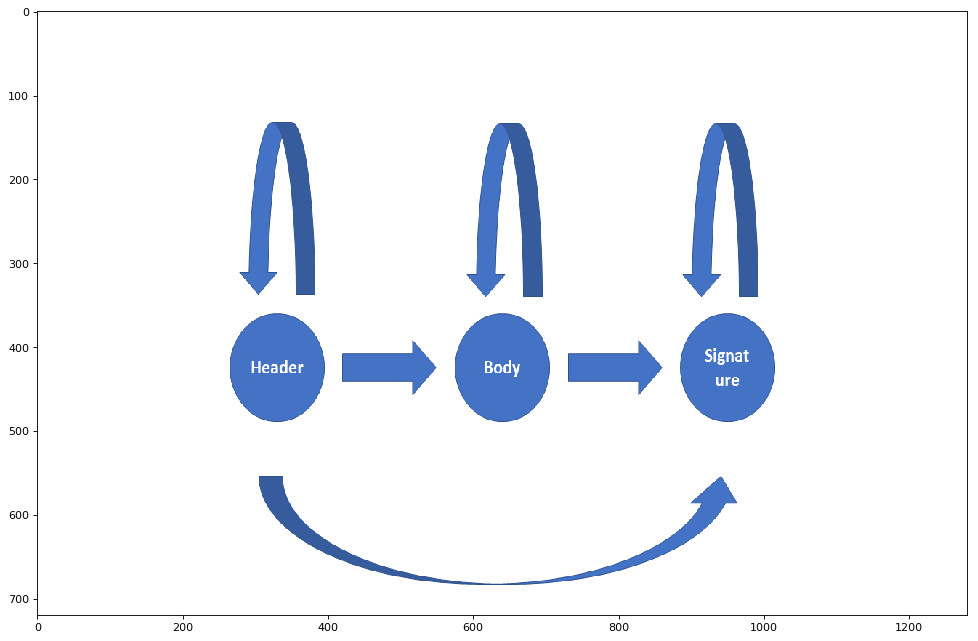

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('3_part_Model.png')
plt.figure(figsize=(15,10),dpi=80)
imgplot = plt.imshow(img, aspect='auto')

If this image is not displayed, please view the 3_part_Model.png file.

Nb : We can transition from the header to the signature if the body of the mail is empty.

An example for A would be : 

$A = \begin{bmatrix}
    0.1   & 0.8  & 0.1 \\
    0     & 0.2  & 0.8 \\
    0     & 0    & 1
\end{bmatrix}$

# Question 6

We propose the following model in order to take into account referencing to other mails.

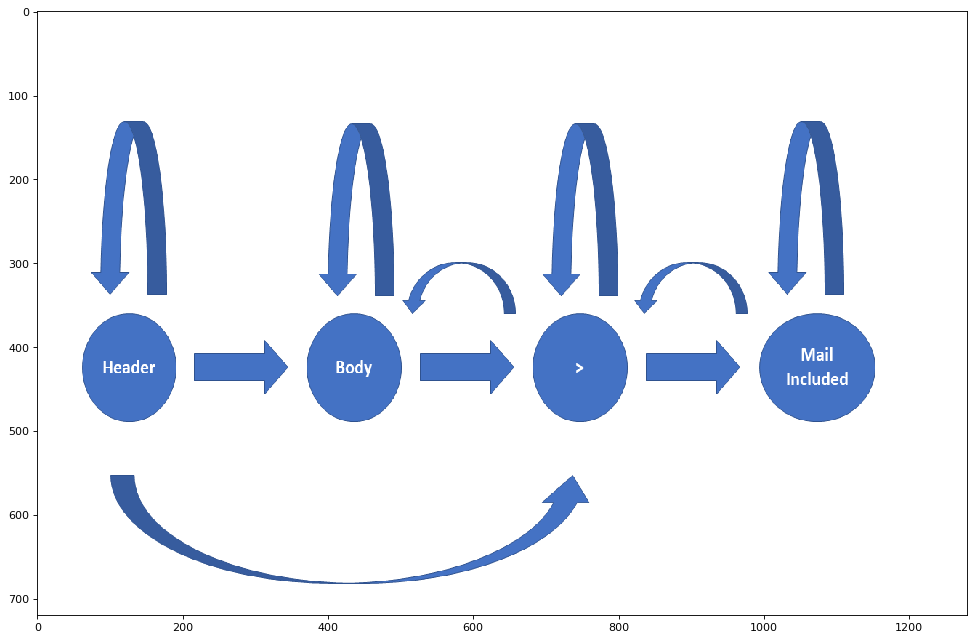

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('mail_included.png')
plt.figure(figsize=(15,10),dpi=80)
imgplot = plt.imshow(img, aspect='auto')

The Viterbi Method has been proven to be effective in the simple case of having to separate the header of a mail the body. However, in cases where there are many different states, or loops within the Markov Chain, it seems unlikely that we would use such an approach.

Furthermore, the A and P matrices need to be learnt ahead of time, which adds computational strain on this method.

In practise, it is likely that deep learning methods are preferred to the Viterbi algorithm.

If this image is not displayed, please view the mail_included.png file.